In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

### 1. 스플라인 보간법

In [3]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

#결측치 생성
#100 - 200 -> NAN
data.loc[100:200, 'Value'] = np.nan

#결측치 체크 확인
print(data.loc[100:200])

          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


#### 스플라인 보간법은 유효한 데이터에 대해서만 적용이 가능합니다. 그래서 결측치를 제거하거나 대처하는 작업이 필요합니다.

In [11]:
data['Value_filled_1'] = data['Value'].interpolate(method='linear')
print(data.loc[100:200])
#결측치 처리

          Date  Value  Value_filled  Value_spline  Value_filled_2   
100 2023-04-11    NaN     -1.861938     -1.861938       -1.871248  \
101 2023-04-12    NaN     -1.852628     -1.852628       -1.871248   
102 2023-04-13    NaN     -1.843318     -1.843318       -1.871248   
103 2023-04-14    NaN     -1.834009     -1.834009       -1.871248   
104 2023-04-15    NaN     -1.824699     -1.824699       -1.871248   
..         ...    ...           ...           ...             ...   
196 2023-07-16    NaN     -0.968189     -0.968189       -0.921640   
197 2023-07-17    NaN     -0.958879     -0.958879       -0.921640   
198 2023-07-18    NaN     -0.949570     -0.949570       -0.921640   
199 2023-07-19    NaN     -0.940260     -0.940260       -0.921640   
200 2023-07-20    NaN     -0.930950     -0.930950       -0.921640   

     Value_filled_1  
100       -1.861938  
101       -1.852628  
102       -1.843318  
103       -1.834009  
104       -1.824699  
..              ...  
196       -0.9681

In [7]:
#스플라인 보간법 적용
spl = CubicSpline(data.index, data['Value_filled'])
data['Value_spline'] = spl(data.index)
print(data.loc[100:200])

          Date  Value  Value_filled  Value_spline
100 2023-04-11    NaN     -1.861938     -1.861938
101 2023-04-12    NaN     -1.852628     -1.852628
102 2023-04-13    NaN     -1.843318     -1.843318
103 2023-04-14    NaN     -1.834009     -1.834009
104 2023-04-15    NaN     -1.824699     -1.824699
..         ...    ...           ...           ...
196 2023-07-16    NaN     -0.968189     -0.968189
197 2023-07-17    NaN     -0.958879     -0.958879
198 2023-07-18    NaN     -0.949570     -0.949570
199 2023-07-19    NaN     -0.940260     -0.940260
200 2023-07-20    NaN     -0.930950     -0.930950

[101 rows x 4 columns]


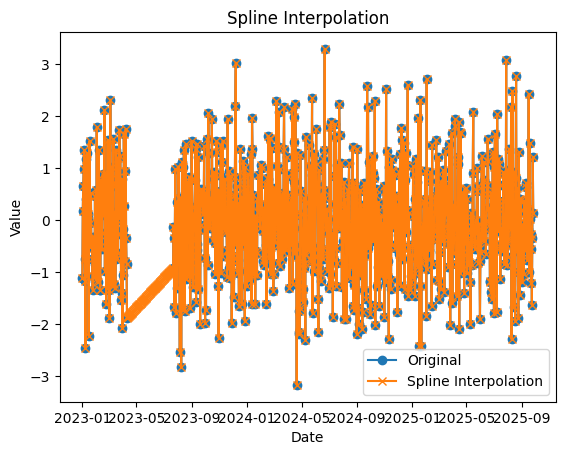

In [8]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_spline'], 'x-', label='Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Spline Interpolation')
plt.legend()
plt.show()

#### 스플라인 보간법 -> 연속성이 있는 데이터에서 적용된다.
#### 우선적으로 결측값을 제거하거나 다른 방법으로 대처하고 스플라인 보간법을 하여야한다.

### 2. pandas에서 제공하는 최근접 이웃 보간

In [12]:
#최근접 이웃 보간 적용
data['Value_filled_2'] = data['Value'].interpolate(method='nearest')
print(data.loc[100:200])

          Date  Value  Value_filled  Value_spline  Value_filled_2   
100 2023-04-11    NaN     -1.861938     -1.861938       -1.871248  \
101 2023-04-12    NaN     -1.852628     -1.852628       -1.871248   
102 2023-04-13    NaN     -1.843318     -1.843318       -1.871248   
103 2023-04-14    NaN     -1.834009     -1.834009       -1.871248   
104 2023-04-15    NaN     -1.824699     -1.824699       -1.871248   
..         ...    ...           ...           ...             ...   
196 2023-07-16    NaN     -0.968189     -0.968189       -0.921640   
197 2023-07-17    NaN     -0.958879     -0.958879       -0.921640   
198 2023-07-18    NaN     -0.949570     -0.949570       -0.921640   
199 2023-07-19    NaN     -0.940260     -0.940260       -0.921640   
200 2023-07-20    NaN     -0.930950     -0.930950       -0.921640   

     Value_filled_1  
100       -1.861938  
101       -1.852628  
102       -1.843318  
103       -1.834009  
104       -1.824699  
..              ...  
196       -0.9681

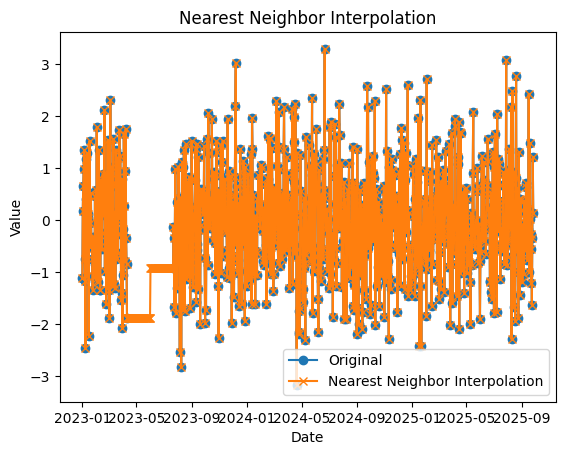

In [14]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled_2'], 'x-', label='Nearest Neighbor Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Nearest Neighbor Interpolation')
plt.legend()
plt.show()

### 3. 평균값 대처

In [16]:
mean_value = data['Value'].mean()
print(mean_value)
data['Value_filled_3'] = data['Value'].fillna(mean_value)
print(data.loc[100:200])

-0.028579279240037888
          Date  Value  Value_filled  Value_spline  Value_filled_2   
100 2023-04-11    NaN     -1.861938     -1.861938       -1.871248  \
101 2023-04-12    NaN     -1.852628     -1.852628       -1.871248   
102 2023-04-13    NaN     -1.843318     -1.843318       -1.871248   
103 2023-04-14    NaN     -1.834009     -1.834009       -1.871248   
104 2023-04-15    NaN     -1.824699     -1.824699       -1.871248   
..         ...    ...           ...           ...             ...   
196 2023-07-16    NaN     -0.968189     -0.968189       -0.921640   
197 2023-07-17    NaN     -0.958879     -0.958879       -0.921640   
198 2023-07-18    NaN     -0.949570     -0.949570       -0.921640   
199 2023-07-19    NaN     -0.940260     -0.940260       -0.921640   
200 2023-07-20    NaN     -0.930950     -0.930950       -0.921640   

     Value_filled_1  Value_filled_3  
100       -1.861938       -0.028579  
101       -1.852628       -0.028579  
102       -1.843318       -0.028579

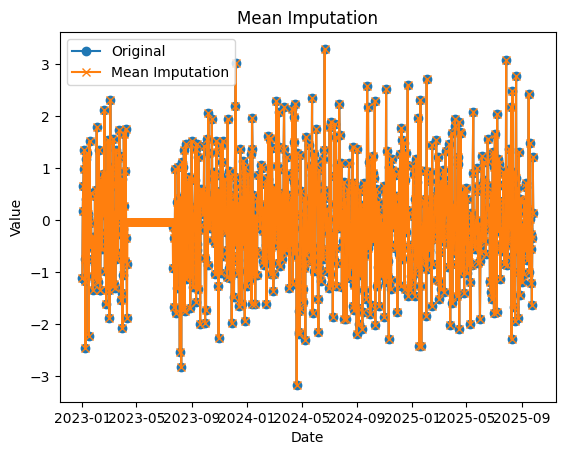

In [17]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled_3'], 'x-', label='Mean Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean Imputation')
plt.legend()
plt.show()

### ARIMA 모델 활용하여 결측치 예측과 대처 실습

In [26]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Value'].dropna(), order=(1,1,1))
model_fit = model.fit()
"""
order=(1,1,1) 매개변수를 사용하여 ARIMA 모델을 설정합니다. 
order 매개변수는 AR, 차분(Differencing), MA 성분을 지정합니다. 
여기서 (1,1,1)은 AR(1) 모델, 차분(degree of differencing)이 1, 
그리고 MA(1) 모델을 의미합니다.
"""

#결측치 예측
predicted_values = model_fit.predict(start=50, end=2000)
print(predicted_values)

#결측치 대처
data.loc[100:200, 'Value_arima'] = predicted_values
print(data.loc[100:200])

50     -0.105435
51     -0.116601
52     -0.100708
53     -0.091283
54     -0.115691
          ...   
1996   -0.028567
1997   -0.028567
1998   -0.028567
1999   -0.028567
2000   -0.028567
Name: predicted_mean, Length: 1951, dtype: float64
          Date  Value  Value_filled  Value_spline  Value_filled_2   
100 2023-04-11    NaN     -1.861938     -1.861938       -1.871248  \
101 2023-04-12    NaN     -1.852628     -1.852628       -1.871248   
102 2023-04-13    NaN     -1.843318     -1.843318       -1.871248   
103 2023-04-14    NaN     -1.834009     -1.834009       -1.871248   
104 2023-04-15    NaN     -1.824699     -1.824699       -1.871248   
..         ...    ...           ...           ...             ...   
196 2023-07-16    NaN     -0.968189     -0.968189       -0.921640   
197 2023-07-17    NaN     -0.958879     -0.958879       -0.921640   
198 2023-07-18    NaN     -0.949570     -0.949570       -0.921640   
199 2023-07-19    NaN     -0.940260     -0.940260       -0.921640   
200

/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodel

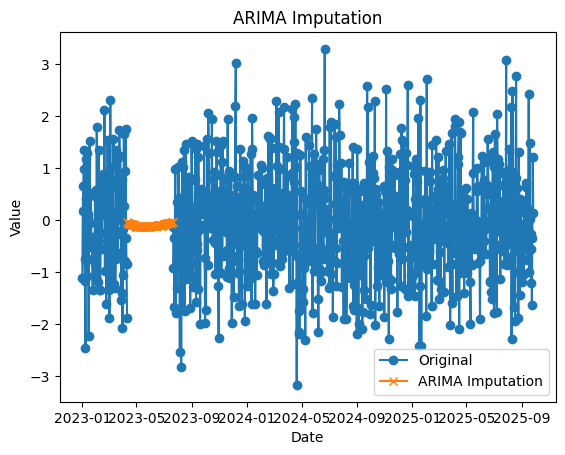

In [28]:
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_arima'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Imputation')
plt.legend()
plt.show()